In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install PyWavelets==1.4.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 51.4 MB/s eta 0:00:00


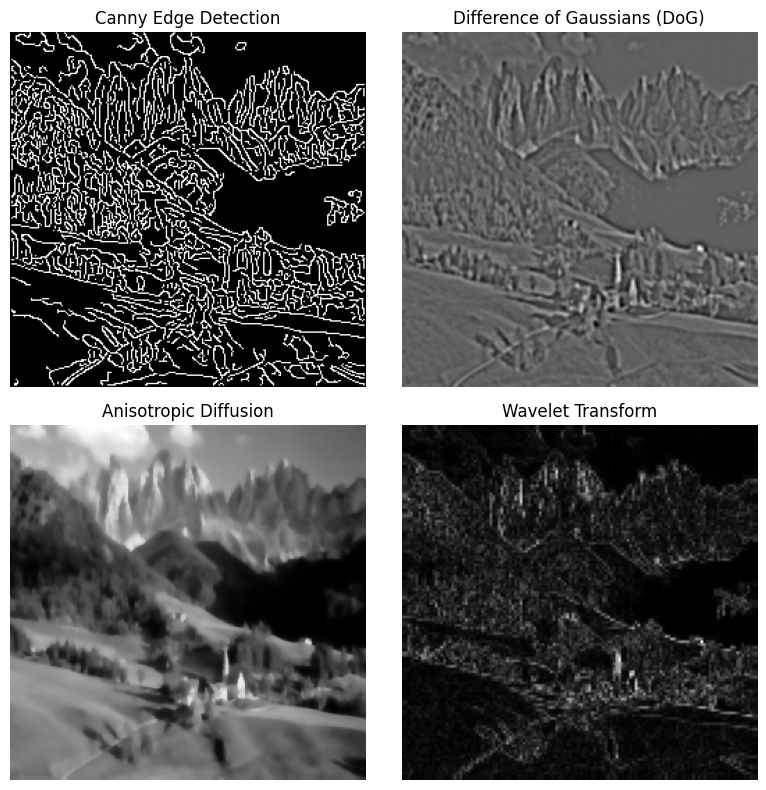

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters, feature
from skimage.transform import resize
from skimage.util import img_as_float
from skimage.restoration import denoise_tv_chambolle

# Load an example image
image = cv2.imread('/content/drive/MyDrive/images/pegunungan.jpg', cv2.IMREAD_GRAYSCALE)
image = resize(image, (256, 256))  # Resize for consistent processing

# Canny Edge Detection
edges_canny = feature.canny(image, sigma=1)

# Difference of Gaussians (DoG)
blur1 = cv2.GaussianBlur(image, (0, 0), 1)
blur2 = cv2.GaussianBlur(image, (0, 0), 2)
edges_dog = blur1 - blur2

# Anisotropic Diffusion
edges_anisotropic = denoise_tv_chambolle(image, weight=0.1, eps=0.0002, max_num_iter=200)

# Wavelet Transform (using PyWavelets)
import pywt
coeffs2 = pywt.dwt2(image, 'bior1.3')
LL, (LH, HL, HH) = coeffs2
edges_wavelet = np.sqrt(LH**2 + HL**2 + HH**2)

# Plotting the results
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

axes[0, 0].imshow(edges_canny, cmap='gray')
axes[0, 0].set_title('Canny Edge Detection')
axes[0, 0].axis('off')

axes[0, 1].imshow(edges_dog, cmap='gray')
axes[0, 1].set_title('Difference of Gaussians (DoG)')
axes[0, 1].axis('off')

axes[1, 0].imshow(edges_anisotropic, cmap='gray')
axes[1, 0].set_title('Anisotropic Diffusion')
axes[1, 0].axis('off')

axes[1, 1].imshow(edges_wavelet, cmap='gray')
axes[1, 1].set_title('Wavelet Transform')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()